In [1]:
using JuMP, Cbc, Clp, Plots

In [2]:
N = 1
d = collect(60:N:150)
p = (1/size(d,1))*ones(size(d,1))
α = 0.9
ω_list = collect(0.0:0.1:1.0)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

=========== ω = 0.0 ===========
optimal solution = -1404.3956043956057
x = 128.0
l = 0.0
=========== ω = 0.1 ===========
optimal solution = -1138.7307692307695
x = 123.0
l = 0.0
=========== ω = 0.2 ===========
optimal solution = -879.3846153846151
x = 116.0
l = 0.0
=========== ω = 0.3 ===========
optimal solution = -629.0769230769229
x = 108.0
l = 0.0
=========== ω = 0.4 ===========
optimal solution = -392.296703296703
x = 97.0
l = 0.0
=========== ω = 0.5 ===========
optimal solution = -177.19780219780307
x = 82.0
l = 0.0
=========== ω = 0.6 ===========
optimal solution = -3.9968028886505635e-13
x = 60.0
l = 0.0
=========== ω = 0.7 ===========
optimal solution = 0.0
x = 0.0
l = 0.0
=========== ω = 0.8 ===========
optimal solution = 0.0
x = 0.0
l = 0.0
=========== ω = 0.9 ===========
optimal solution = 0.0
x = 0.0
l = 0.0
=========== ω = 1.0 ===========
optimal solution = 0.0
x = 0.0
l = 0.0


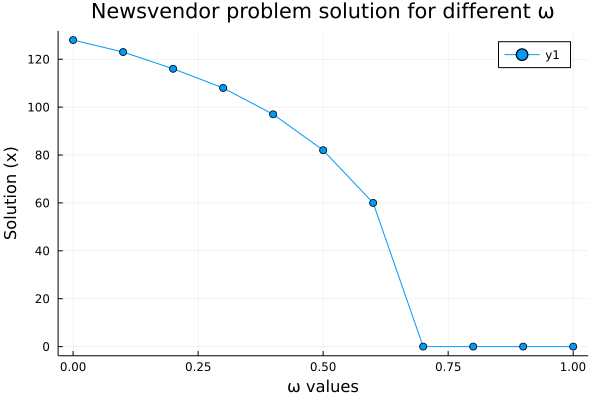


(process:16000): GLib-GIO-WARNING **: 22:24:30.425: Unexpectedly, UWP app `38526MediaLife.ZipPlus_2.0.4.0_x86__1crh1k73ty8mg' (AUMId `38526MediaLife.ZipPlus_1crh1k73ty8mg!ZipExtractor') supports 89 extensions but has no verbs


In [3]:
x_dict=Dict{Float64, Float64}();
for ω in 0.0:0.1:1.0
    
    model_Newsvendor = Model(Clp.Optimizer)
    set_optimizer_attribute(model_Newsvendor, "LogLevel",0)

    @variables(model_Newsvendor,
    begin
        x ≥ 0
        l ≥ 0
        y[1:size(d,1)] ≥ 0
        w[1:size(d,1)] ≥ 0
        θ[1:size(d,1)] ≥ 0
    end)

    @constraints(model_Newsvendor,
    begin
        ct1[s=1:size(d,1)], y[s] ≤ d[s]
        ct2[s=1:size(d,1)], y[s] + w[s] ≤ x
        ct3[s=1:size(d,1)], θ[s] ≥ (-25*y[s] -5*w[s]) - l
        ct4, x<=150
    end)

    @objective(model_Newsvendor, Min, 10 * x + (1-ω)*sum(p[s]*(-25*y[s] -5*w[s]) for s = 1:size(d,1)) + ω * (l + sum(p[s]*θ[s] for s = 1:size(d,1))/ (1-α)))
    optimize!(model_Newsvendor);
    push!(x_dict, ω => value(x))
    println("=========== ω = $(ω) ===========")
    println("optimal solution = $(objective_value(model_Newsvendor))")
    println("x = $(value(x))")
    println("l = $(value(l))")
#     println("w = $(value.(w))")
#     println("y = $(value.(y))")
#     println("θ = $(value.(θ))")

end
plot(x=ω_list,x_dict, shape = :circle,title = "Newsvendor problem solution for different ω", xlabel = "ω values", ylabel = "Solution (x)")